# 차례
## Ⅰ개발환경
## Ⅱ 분석
### 2.1 기본 분석

* 데이터 기본 분석
* 상관관계 분석
* 중요도 분석

### 2.2 트렌드 분석

* 데이터 트렌드 분석
* 트렌드 평균 적용시 성능분석
* Prophet을 사용한 시계열 분석
* Prohet 트렌드 적용시 성능분석


## Ⅲ 데이터 전처리 및 특징정보 추가
### 3.1 데이터 전처리
* 결측치 처리


### 3.2 특징정보 추가
* 시간변수 추가


## Ⅳ 알고리즘 선택

## Ⅴ 결론
## VI 제출 파일 생성 코드

# Ⅰ 개발 환경

## 1. 언어

* Python3

## 2. 필요 라이브러리

* sklearn
* tensorflow
* numpy, pandas
* joblib
* prophet 

link : https://facebook.github.io/prophet/docs/installation.html
* supervised.automl 

link : https://github.com/mljar/mljar-supervised

## 3. 운영체제 환경
* Window : ~Ⅱ 분석 2.2 트렌드 평균 적용시 성능 분석
* Linux : Ⅱ 분석 2.2 prophet ~

# Ⅱ 분석

# 2.1 기본 분석

In [1]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import math

## 2.1.1 데이터 기본 분석

# 데이터 가져오기

In [2]:
따릉이=pd.read_csv('train.csv')

* date: 날짜
* precipitation: 강수량(mm)
* temp_mean: 평균 기온(℃)
* temp_highest: 최고 기온(℃)
* temp_lowest: 최저 기온(℃)
* PM10: 미세먼지(㎍/㎥)
* PM2.5: 초미세먼지(㎍/㎥)
* humidity: 습도(%rh)
* sunshine_sum: 일조합
* sunshine_rate: 일조율
* wind_mean: 평균 풍속(m/s)
* wind_max: 최대 풍속(m/s)
* rentals : 따릉이 대여량

### rental

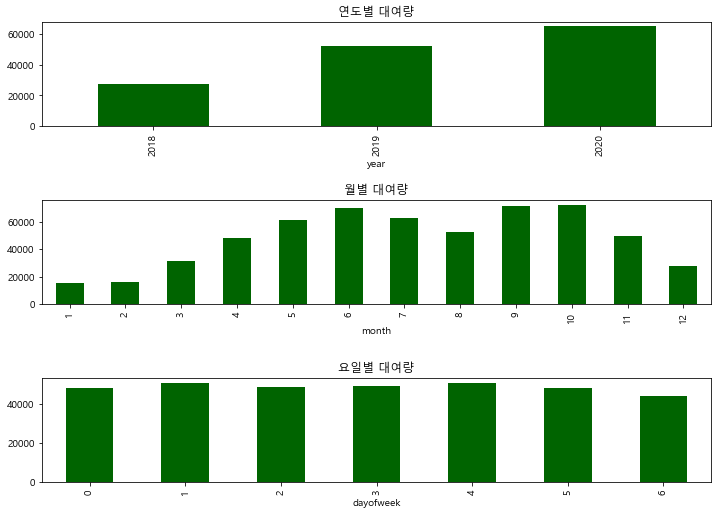

In [3]:
따릉이['date']=pd.to_datetime(따릉이['date'])
따릉이['year']=따릉이['date'].dt.year
따릉이['month']=따릉이['date'].dt.month
따릉이['dayofweek']=따릉이['date'].dt.dayofweek

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

따릉이_연도=따릉이.groupby(['year'])['rental'].mean()
따릉이_연도.plot.bar(color='darkgreen',figsize=(12,8),ax=ax1,title='연도별 대여량')
따릉이_월=따릉이.groupby(['month'])['rental'].mean()
따릉이_월.plot.bar(color='darkgreen',figsize=(12,8),ax=ax2,title='월별 대여량')
따릉이_요일=따릉이.groupby(['dayofweek'])['rental'].mean()
따릉이_요일.plot.bar(color='darkgreen',figsize=(12,8),ax=ax3,title='요일별 대여량')

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.7, hspace=0.7)

- 해가 증가할수록(2018>2019>2020) 대여량이 증가하는 경향을 보인다.
- 겨울철 대여량이 급격히 하락하는 경향을 보인다.
- 요일별 대여량 차이는 크지 않다.

### precipitation: 강수량(mm)

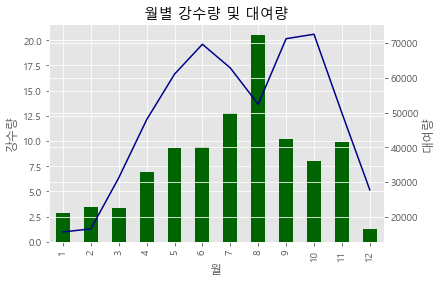

<Figure size 1440x864 with 0 Axes>

In [4]:
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 출력 설정

#2축 그래프 그리기
강수량_월=따릉이.groupby(['month'])['precipitation'].mean()
ax1=강수량_월.plot(kind='bar',color='darkgreen')
ax2=ax1.twinx()
rental_월=따릉이.groupby(['month'])['rental'].mean()
ax2.plot(np.arange(0, 12),rental_월,color='darkblue')

ax1.set_xlabel('월')
ax1.set_ylabel('강수량')
ax2.set_ylabel('대여량')

plt.title('월별 강수량 및 대여량')
plt.figure(figsize=(20,12))
plt.show()

- 겨울철 강수량이 적고, 여름철 강수량이 집중되는 모습을 확인할 수 있다.
- 강수 량이 많은 8월에는 대여량이 급격하게 감소하는 것을 확인할 수 있다. 

### temp_mean, temp_highest, temp_lowest

- temp_mean, temp_highest, temp_lowest의 경향이 비슷하다.

<ipython-input-5-1dd68db15043>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  월별_temp=따릉이.groupby(['month'])['temp_highest','temp_mean','temp_lowest'].mean()


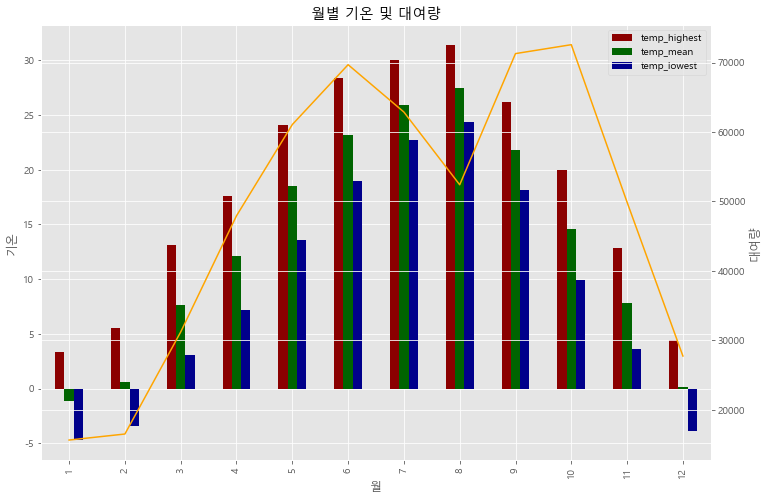

<Figure size 1440x864 with 0 Axes>

In [5]:
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 출력 설정

월별_temp=따릉이.groupby(['month'])['temp_highest','temp_mean','temp_lowest'].mean()
ax1=월별_temp.plot(kind='bar',figsize=(12,8),color=['darkred','darkgreen','darkblue'])
ax2=ax1.twinx()
rental_월=따릉이.groupby(['month'])['rental'].mean()
ax2.plot(np.arange(0, 12),rental_월,color='orange')

ax1.set_xlabel('월')
ax1.set_ylabel('기온')
ax2.set_ylabel('대여량')

plt.title('월별 기온 및 대여량')
plt.figure(figsize=(20,12))
plt.show()

### PM10, PM2.5

- PM10, PM2.5의 경향은 비슷하고,여름철 낮은 경향을 보인다.
- 미세먼지와 대여량에는 상관관계가 약하다는 것을 아래 그래프로 확인할 수 있다. 

<ipython-input-6-474231f22f1a>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  월별_temp=따릉이.groupby(['month'])['PM10','PM2.5'].mean()


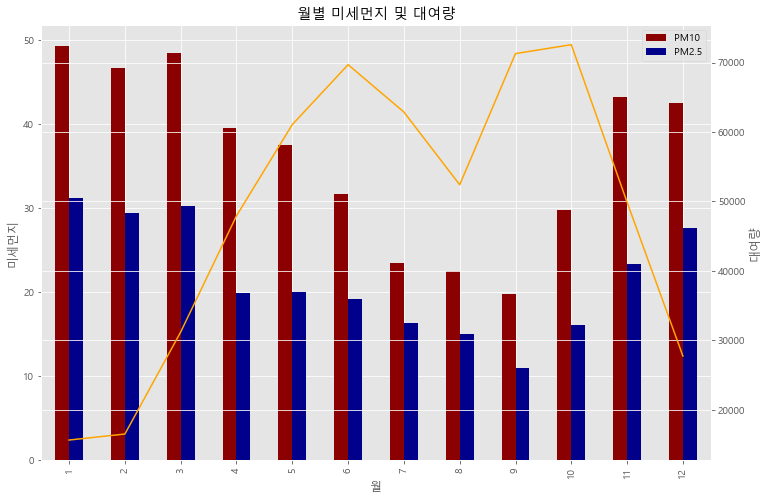

<Figure size 1440x864 with 0 Axes>

In [6]:
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 출력 설정

월별_temp=따릉이.groupby(['month'])['PM10','PM2.5'].mean()
ax1=월별_temp.plot(kind='bar',figsize=(12,8),color=['darkred','darkblue'])
ax2=ax1.twinx()
rental_월=따릉이.groupby(['month'])['rental'].mean()
ax2.plot(np.arange(0, 12),rental_월,color='orange')

ax1.set_xlabel('월')
ax1.set_ylabel('미세먼지')
ax2.set_ylabel('대여량')

plt.title('월별 미세먼지 및 대여량')
plt.figure(figsize=(20,12))
plt.show()

### humidity

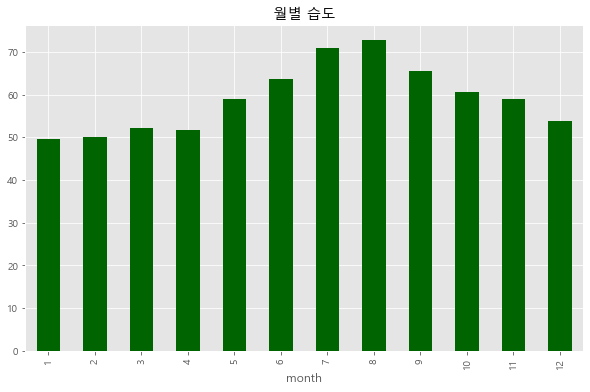

In [7]:
습도_월=따릉이.groupby(['month'])['humidity'].mean()
습도_월.plot.bar(color='darkgreen',figsize=(10,6))
plt.title('월별 습도')
plt.show()

### sunshine_sum, sunshine_rate

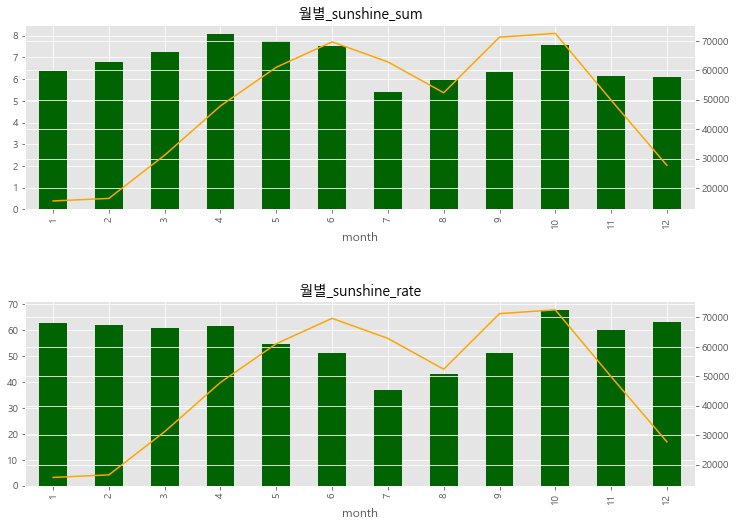

In [8]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

월별_sunshine_sum=따릉이.groupby(['month'])['sunshine_sum'].mean()
ax3=월별_sunshine_sum.plot.bar(color='darkgreen',figsize=(12,8),ax=ax1,title='월별_sunshine_sum')
ax4=ax3.twinx()
rental_월=따릉이.groupby(['month'])['rental'].mean()
ax4.plot(np.arange(0, 12),rental_월,color='orange')

월별_sunshine_rate=따릉이.groupby(['month'])['sunshine_rate'].mean()
ax5=월별_sunshine_rate.plot.bar(color='darkgreen',figsize=(12,8),ax=ax2,title='월별_sunshine_rate')
ax6=ax5.twinx()
rental_월=따릉이.groupby(['month'])['rental'].mean()
ax6.plot(np.arange(0, 12),rental_월,color='orange')

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.7, hspace=0.5)

### wind_mean, wind_max

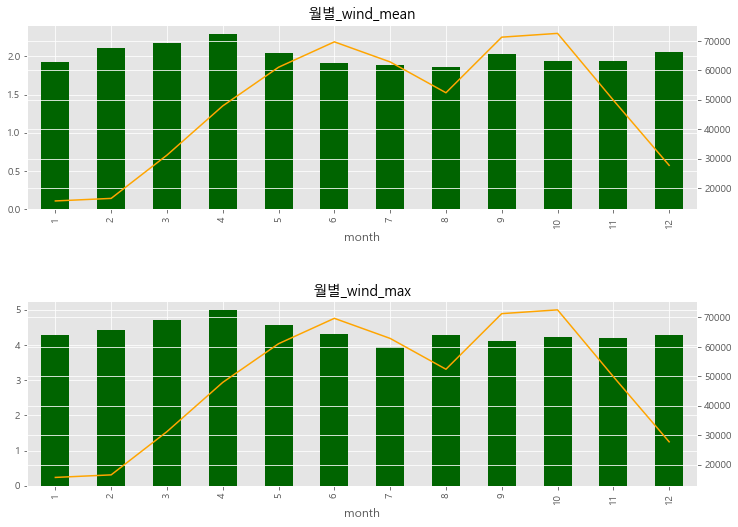

In [9]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

월별_wind_mean=따릉이.groupby(['month'])['wind_mean'].mean()
ax3=월별_wind_mean.plot.bar(color='darkgreen',figsize=(12,8),ax=ax1,title='월별_wind_mean')
ax4=ax3.twinx()
rental_월=따릉이.groupby(['month'])['rental'].mean()
ax4.plot(np.arange(0, 12),rental_월,color='orange')

월별_wind_max=따릉이.groupby(['month'])['wind_max'].mean()
ax5=월별_wind_max.plot.bar(color='darkgreen',figsize=(12,8),ax=ax2,title='월별_wind_max')
ax6=ax5.twinx()
rental_월=따릉이.groupby(['month'])['rental'].mean()
ax6.plot(np.arange(0, 12),rental_월,color='orange')

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.7, hspace=0.5)

## 2.1.2 상관관계 분석

In [10]:
따릉이.corr(method='pearson')

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,dayofweek
precipitation,1.000000,0.236759,0.191100,0.269249,-0.309913,-0.267352,0.569966,-0.377028,-0.377292,0.049306,0.157582,-0.279097,0.025600,0.082501,-0.072778
temp_mean,0.236759,1.000000,0.989381,0.989154,-0.337365,-0.281824,0.457462,-0.016656,-0.226370,-0.146361,-0.111282,0.563741,0.010501,0.229226,0.003292
temp_highest,0.191100,0.989381,1.000000,0.961775,-0.305294,-0.260756,0.377355,0.085341,-0.128156,-0.175558,-0.129259,0.591219,-0.003496,0.213061,0.006144
temp_lowest,0.269249,0.989154,0.961775,1.000000,-0.359186,-0.293038,0.529384,-0.108174,-0.307688,-0.116424,-0.093636,0.524770,0.019899,0.233542,0.004098
PM10,-0.309913,-0.337365,-0.305294,-0.359186,1.000000,0.905441,-0.211069,0.057230,0.115529,-0.118120,-0.032315,-0.179880,0.032338,-0.230274,-0.027621
PM2.5,-0.267352,-0.281824,-0.260756,-0.293038,0.905441,1.000000,-0.072204,-0.019315,0.034618,-0.207875,-0.120697,-0.209074,0.035106,-0.222941,0.001776
humidity,0.569966,0.457462,0.377355,0.529384,-0.211069,-0.072204,1.000000,-0.618732,-0.664106,-0.018888,-0.003313,0.088708,0.150492,0.227960,-0.010327
sunshine_sum,-0.377028,-0.016656,0.085341,-0.108174,0.057230,-0.019315,-0.618732,1.000000,0.958264,0.023203,0.041256,0.233699,-0.099207,-0.070238,-0.003901
sunshine_rate,-0.377292,-0.226370,-0.128156,-0.307688,0.115529,0.034618,-0.664106,0.958264,1.000000,0.027294,0.037391,0.118870,-0.078575,-0.022317,-0.007800
wind_mean,0.049306,-0.146361,-0.175558,-0.116424,-0.118120,-0.207875,-0.018888,0.023203,0.027294,1.000000,0.816071,0.071454,0.379364,-0.065497,-0.042249


* 상관관계 분석에서 rental과 상관관계가 두드러지게 나타나는 feature은 보이지 않았다

## 2.1.3 중요도 분석

In [15]:
따릉이.shape

(1074, 18)

In [17]:
df=따릉이
df=df.dropna()
#df.astype({'rental2':'float64'})
data_y=df['rental']
X_features=df.drop(['date','rental','rental2','temp_lowest','temp_mean','humidity','wind_max','sunshine_rate'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X_features,data_y,test_size=0.3,random_state=777)
scaler = StandardScaler()
scaled_val = scaler.fit_transform(X_features)
scaled_x = pd.DataFrame(scaled_val, columns=X_features.columns)
model_randomForest = RandomForestRegressor()
model_randomForest.fit(X_train, y_train.values.ravel())

RandomForestRegressor()

In [18]:
X_train

,precipitation,temp_highest,PM10,PM2.5,sunshine_sum,wind_mean,year,month,day,dayofweek
287,0.3,21.1,32.0,20.0,9.6,1.1,2018,10,21,0
672,0.3,17.3,40.0,21.0,9.0,2.1,2019,11,22,0
856,0.0,22.9,39.0,24.0,4.8,2.1,2020,5,26,1
305,1.0,14.7,9.0,5.0,0.0,1.8,2018,11,8,0
486,0.0,25.9,24.0,13.0,4.3,2.1,2019,5,18,0
...,...,...,...,...,...,...,...,...,...,...
639,0.3,22.9,33.0,21.0,9.3,1.3,2019,10,20,0
71,0.0,12.5,52.0,36.0,0.0,1.2,2018,3,18,0
934,0.3,31.3,22.0,14.0,2.1,1.9,2020,8,12,0
815,0.3,20.2,60.0,38.0,10.0,2.2,2020,4,15,0


(-1.0, 10.0)

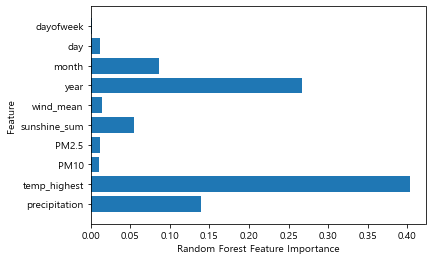

In [19]:
n_features = X_train.shape[1]
plt.barh(np.arange(n_features), model_randomForest.feature_importances_, align="center")
plt.yticks(np.arange(n_features), X_test.columns)
plt.xlabel("Random Forest Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

In [20]:
model_randomForest.score(X_test,y_test)

0.9119136083604823

# 2.2 트렌드 분석

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras import optimizers

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 2.2.1 데이터 트렌드 분석

In [32]:
train= pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [33]:
train=train.set_index("date")

In [34]:
year_2018=(train[0:365])
year_2019=(train[365:730])
year_2020=(train[730:])

In [35]:
year_2018=year_2018['rental']
year_2019=year_2019['rental']
year_2020=year_2020['rental']

- 아래 그래프를 통해 대여량의 대한 트랜드는 바뀌지 않은 것을 확인할 수 있다.
- 여기서 바뀐것은 대여량의 단위가 증가한 것을 확인할 수 있다. 

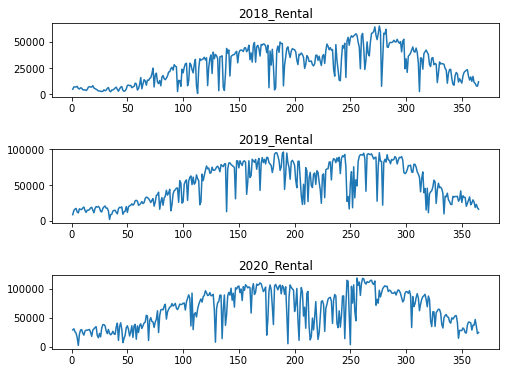

In [37]:
a=range(1,366)
fig = plt.figure(figsize=(8,6))
plt.subplots_adjust(hspace=0.7)
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
ax1.plot(a,year_2018)
ax1.set_title("2018_Rental")
ax2.plot(a,year_2019)
ax2.set_title("2019_Rental")
ax3.plot(a,year_2020)
ax3.set_title("2020_Rental")
plt.show()

In [38]:
year_2018=train[0:365]
year_2019=train[365:730]
year_2020=train[730:]
column_name=year_2018.columns

In [39]:
column_name

Index(['precipitation', 'temp_mean', 'temp_highest', 'temp_lowest', 'PM10',
       'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate', 'wind_mean',
       'wind_max', 'rental'],
      dtype='object')

In [40]:
# 매해 변하는 Feature 변화
for i in column_name:
    print("{} \n2018~2019 변화폭 {} \n2019~2020 변화폭 {}".format(i,(year_2019[i].mean()/year_2018[i].mean()),(year_2020[i].mean()/year_2019[i].mean())))

precipitation 
2018~2019 변화폭 0.6372394180286952 
2019~2020 변화폭 1.721727061294921
temp_mean 
2018~2019 변화폭 1.0399924145051538 
2019~2020 변화폭 0.984601981481856
temp_highest 
2018~2019 변화폭 1.0314755198877072 
2019~2020 변화폭 0.9672366358015562
temp_lowest 
2018~2019 변화폭 1.041723285979 
2019~2020 변화폭 1.0207524235866112
PM10 
2018~2019 변화폭 1.1004193047536701 
2019~2020 변화폭 0.9553927924052965
PM2.5 
2018~2019 변화폭 1.1179624158113726 
2019~2020 변화폭 0.9508330086420984
humidity 
2018~2019 변화폭 0.9879684624991661 
2019~2020 변화폭 1.113737467311274
sunshine_sum 
2018~2019 변화폭 0.9772702014148137 
2019~2020 변화폭 0.8874165450147863
sunshine_rate 
2018~2019 변화폭 0.9880323566151881 
2019~2020 변화폭 0.9051542486445534
wind_mean 
2018~2019 변화폭 1.1190325640214986 
2019~2020 변화폭 1.2210764232236198
wind_max 
2018~2019 변화폭 1.0746113989637303 
2019~2020 변화폭 1.1384120861459333
rental 
2018~2019 변화폭 1.8852763007223596 
2019~2020 변화폭 1.2410181481371854


In [41]:
# 2018년 기준으로 바뀐 Feature 변화
for i in column_name:
    print("{} \n2018~2019 변화폭 {} \n2018~2020 변화폭 {}".format(i,(year_2019[i].mean()/year_2018[i].mean()),(year_2020[i].mean()/year_2018[i].mean())))

precipitation 
2018~2019 변화폭 0.6372394180286952 
2018~2020 변화폭 1.097152350543831
temp_mean 
2018~2019 변화폭 1.0399924145051538 
2018~2020 변화폭 1.0239785920478741
temp_highest 
2018~2019 변화폭 1.0314755198877072 
2018~2020 변화폭 0.9976809117678471
temp_lowest 
2018~2019 변화폭 1.041723285979 
2018~2020 변화폭 1.0633415688696728
PM10 
2018~2019 변화폭 1.1004193047536701 
2018~2020 변화폭 1.0513326723853038
PM2.5 
2018~2019 변화폭 1.1179624158113726 
2018~2020 변화폭 1.062995567374716
humidity 
2018~2019 변화폭 0.9879684624991661 
2018~2020 변화폭 1.1003374932072347
sunshine_sum 
2018~2019 변화폭 0.9772702014148137 
2018~2020 변화폭 0.8672457456854383
sunshine_rate 
2018~2019 변화폭 0.9880323566151881 
2018~2020 변화폭 0.8943216853885281
wind_mean 
2018~2019 변화폭 1.1190325640214986 
2018~2020 변화폭 1.3664242807461278
wind_max 
2018~2019 변화폭 1.0746113989637303 
2018~2020 변화폭 1.2233506044905
rental 
2018~2019 변화폭 1.8852763007223596 
2018~2020 변화폭 2.339662103449386


* 햇수로 보았을 때 Rental과 강수량을 제외하고 큰 차이는 없음.
* plot을 보았을 때 Rental의 Trend는 비슷함 특정 달에 많이 타고 특정 달에 적게 탐.
* plot을 보았을 때 단위만 달라진 것을 확인할 수 있음. 

# Random Forest

- 기본적으로 Nan값은 평균으로 넣어주었다. 
- 여기서 문제점은 precipitation인데 해당 Feature는 약 70%가 Nan 값이기 때문에 0으로 대체하였다.

In [61]:
PM10_MEAN=(train['PM10'].mean()+test['PM10'].mean())/2
PM2_MEAN=(train['PM2.5'].mean()+test['PM2.5'].mean())/2
sunshine_sum_mean=(train['sunshine_sum'].mean()+test['sunshine_sum'].mean())/2

train['precipitation'].fillna(0,inplace=True)
train['PM10'].fillna(PM10_MEAN,inplace=True)
train['PM2.5'].fillna(PM2_MEAN,inplace=True)
train['sunshine_sum'].fillna(sunshine_sum_mean,inplace=True)
test['precipitation'].fillna(0,inplace=True)
test['sunshine_sum'].fillna(sunshine_sum_mean,inplace=True)

In [62]:
X=train.drop('rental',axis=1)
y=pd.DataFrame(train['rental'])

### 학습
1. Rental의 그래프 개형은 매년 비슷하다.
2. Rental의 단위만 다르기 때문에 평균 변화율을 따로 나누어 주어 학습을 시켰다. 

In [69]:
year_2018,year_2019,year_2020=train[0:365],train[365:730],train[730:]
change_2019=year_2019['rental'].mean()/year_2018['rental'].mean()
change_2020=year_2020['rental'].mean()/year_2018['rental'].mean()

In [70]:
X_train =pd.concat([year_2018.drop("rental",axis=1),year_2019.drop("rental",axis=1)],axis=0)
y_train=pd.concat([year_2018["rental"],year_2019["rental"]/change_2019],axis=0)

In [65]:
X_test=year_2020.drop("rental",axis=1)
y_test=year_2020['rental']/change_2020

학습 결과가 82%로 상당히 학습이 잘되었다라는 것을 확인할 수 있다.

In [66]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))

0.8233473920420488


## 시계열 모델 학습

1. 해당 데이터는 시계열 데이터이다.
2. 시간적 영향이 있을까하고 RNN 모델 중 하나인 LSTM으로 학습을 시켰다. 

## 신경망 input data 전처리

1. series_to_supervised 함수 학습시킬 데이터를 벡터로 만들어 준다.
2. n_in 몇 개의 데이터 샘플을 넣을 것인지 n_out은 n_in을 가지고 며칠을 예측할 것인지를 의미한다.

In [72]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i >= 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]

    fin= pd.concat(cols, axis=1)
    fin.columns = names
    # drop rows with NaN values
    if dropnan:
        fin.dropna(inplace=True)
    return fin


In [73]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv('test.csv')

학습 방법은 RandomForrest와 동일하다

In [74]:
year_2018=train_df[0:365]
year_2019=train_df[365:730]
year_2020=train_df[730:]

In [75]:
change_2019=year_2019['rental'].mean()/year_2018['rental'].mean()
change_2020=year_2020['rental'].mean()/year_2018['rental'].mean()

In [76]:
year_2019=train_df[365:730]
year_2019['rental']=year_2019['rental']/change_2019
year_2020=train_df[730:]
year_2020['rental']=year_2020['rental']/change_2020

C:\Users\yong5\AppData\Local\Temp/ipykernel_20692/888208454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2019['rental']=year_2019['rental']/change_2019
C:\Users\yong5\AppData\Local\Temp/ipykernel_20692/888208454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2020['rental']=year_2020['rental']/change_2020


In [90]:
change_2021=change_2020+((change_2019-1)-(change_2020-change_2019))

In [91]:
PM10_MEAN=train_df['PM10'].mean()
PM2_MEAN=train_df['PM2.5'].mean()
sunshine_sum_mean=train_df['sunshine_sum'].mean()

train_df['precipitation'].fillna(0,inplace=True)
train_df['PM10'].fillna(PM10_MEAN,inplace=True)
train_df['PM2.5'].fillna(PM2_MEAN,inplace=True)
train_df['sunshine_sum'].fillna(sunshine_sum_mean,inplace=True)
test_df['precipitation'].fillna(0,inplace=True)
test_df['sunshine_sum'].fillna(sunshine_sum_mean,inplace=True)

In [92]:
column_name=list(train_df.columns)
column_name.remove('date')
features=train_df[column_name]
features.index=train_df['date']
train=features[:]

In [93]:
train['rental']=np.array(pd.concat([year_2018['rental'],year_2019['rental'],year_2020['rental']],axis=0))
train

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
date,,,,,,,,,,,,
2018-01-01,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950.000000
2018-01-02,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136.000000
2018-01-03,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156.000000
2018-01-04,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102.000000
2018-01-05,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,15858.272844
2020-12-28,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,20050.758582
2020-12-29,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,15278.701975


In [94]:
test=test_df
test.index=test_df['date']
test=test.drop('date',axis=1)

In [115]:
values = train_feature.values
values = values.astype('float32')
scaler=MinMaxScaler(feature_range=(0,1))
scaled_feature=scaler.fit_transform(values)
scaled_feature=pd.DataFrame(scaled_feature)
scaled_for_train=scaled_feature[:730]
scaled_for_test=scaled_feature[730:]
scaled_for_test

,0,1,2,3,4,5,6,7,8,9,10,11
730,0.000000,0.327160,0.288270,0.366053,0.112474,0.357724,0.592269,0.000000,0.000000,0.136364,0.266667,0.180536
731,0.000000,0.304527,0.304175,0.310838,0.126789,0.382114,0.486284,0.647059,0.945777,0.250000,0.211111,0.193382
732,0.000000,0.331276,0.333996,0.323108,0.106339,0.325203,0.410224,0.580882,0.848801,0.295455,0.322222,0.159243
733,0.000000,0.333333,0.343936,0.314928,0.100204,0.308943,0.345387,0.522059,0.763295,0.113636,0.144444,0.142488
734,0.017459,0.370370,0.304175,0.392638,0.075665,0.243902,0.592269,0.000000,0.000000,0.568182,0.422222,0.090107
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.000000,0.150206,0.135189,0.116564,0.059305,0.154472,0.536160,0.279412,0.412930,0.250000,0.166667,NaN
1456,0.000000,0.222222,0.194831,0.206544,0.096115,0.300813,0.697008,0.125000,0.184567,0.363636,0.166667,NaN
1457,0.001940,0.314815,0.330020,0.302658,0.126789,0.390244,0.685786,0.132353,0.196038,0.454545,0.477778,NaN
1458,0.000000,0.226337,0.216700,0.241309,0.053170,0.130081,0.381546,0.536765,0.792492,0.613636,0.555556,NaN


In [116]:
n_day=1
reframed = series_to_supervised(scaled_feature, n_day, 1)
values = reframed.values
values.shape

(1094, 24)

In [117]:
n_train_days=730

2년을 학습시킨다

In [126]:
train = values[:n_train_days, :]
test=values[n_train_days:,:]
train_X, train_y = train[:, :-1], train[:,-1:]
test_X, test_y=test[:,:-1],test[:,-1:]

In [127]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X=test_X.reshape((test_X.shape[0],1,test_X.shape[1]))
learning_rate=0.01
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(100))
model.add(Dense(1))
model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='mae')

## 학습

1. epochs가 300이면 loss가 수렴
2. batch_size 총 30일의 데이터가 들어감.
3. 30일은 각 월별로 특징을 가지고 있기 때문에 30일로 batch_size 정함.

In [128]:
model.fit(train_X,train_y,epochs=300,batch_size=30,verbose=2)

Epoch 1/300
25/25 - 1s - loss: 0.1707 - 1s/epoch - 43ms/step
Epoch 2/300
25/25 - 0s - loss: 0.0997 - 24ms/epoch - 945us/step
Epoch 3/300
25/25 - 0s - loss: 0.0806 - 24ms/epoch - 960us/step
Epoch 4/300
25/25 - 0s - loss: 0.0935 - 23ms/epoch - 934us/step
Epoch 5/300
25/25 - 0s - loss: 0.0730 - 24ms/epoch - 941us/step
Epoch 6/300
25/25 - 0s - loss: 0.0691 - 24ms/epoch - 957us/step
Epoch 7/300
25/25 - 0s - loss: 0.0635 - 24ms/epoch - 957us/step
Epoch 8/300
25/25 - 0s - loss: 0.0653 - 24ms/epoch - 957us/step
Epoch 9/300
25/25 - 0s - loss: 0.0616 - 23ms/epoch - 930us/step
Epoch 10/300
25/25 - 0s - loss: 0.0619 - 23ms/epoch - 918us/step
Epoch 11/300
25/25 - 0s - loss: 0.0580 - 24ms/epoch - 957us/step
Epoch 12/300
25/25 - 0s - loss: 0.0612 - 24ms/epoch - 942us/step
Epoch 13/300
25/25 - 0s - loss: 0.0664 - 23ms/epoch - 906us/step
Epoch 14/300
25/25 - 0s - loss: 0.0574 - 24ms/epoch - 966us/step
Epoch 15/300
25/25 - 0s - loss: 0.0603 - 24ms/epoch - 963us/step
Epoch 16/300
25/25 - 0s - loss: 0.056

25/25 - 0s - loss: 0.0419 - 24ms/epoch - 966us/step
Epoch 128/300
25/25 - 0s - loss: 0.0431 - 25ms/epoch - 1ms/step
Epoch 129/300
25/25 - 0s - loss: 0.0433 - 24ms/epoch - 979us/step
Epoch 130/300
25/25 - 0s - loss: 0.0424 - 24ms/epoch - 974us/step
Epoch 131/300
25/25 - 0s - loss: 0.0411 - 23ms/epoch - 931us/step
Epoch 132/300
25/25 - 0s - loss: 0.0416 - 24ms/epoch - 944us/step
Epoch 133/300
25/25 - 0s - loss: 0.0401 - 24ms/epoch - 964us/step
Epoch 134/300
25/25 - 0s - loss: 0.0422 - 24ms/epoch - 950us/step
Epoch 135/300
25/25 - 0s - loss: 0.0405 - 24ms/epoch - 945us/step
Epoch 136/300
25/25 - 0s - loss: 0.0427 - 24ms/epoch - 978us/step
Epoch 137/300
25/25 - 0s - loss: 0.0434 - 24ms/epoch - 964us/step
Epoch 138/300
25/25 - 0s - loss: 0.0428 - 26ms/epoch - 1ms/step
Epoch 139/300
25/25 - 0s - loss: 0.0446 - 25ms/epoch - 1ms/step
Epoch 140/300
25/25 - 0s - loss: 0.0511 - 24ms/epoch - 940us/step
Epoch 141/300
25/25 - 0s - loss: 0.0448 - 23ms/epoch - 934us/step
Epoch 142/300
25/25 - 0s - los

Epoch 252/300
25/25 - 0s - loss: 0.0372 - 25ms/epoch - 992us/step
Epoch 253/300
25/25 - 0s - loss: 0.0374 - 24ms/epoch - 942us/step
Epoch 254/300
25/25 - 0s - loss: 0.0391 - 24ms/epoch - 945us/step
Epoch 255/300
25/25 - 0s - loss: 0.0362 - 23ms/epoch - 926us/step
Epoch 256/300
25/25 - 0s - loss: 0.0371 - 23ms/epoch - 918us/step
Epoch 257/300
25/25 - 0s - loss: 0.0355 - 25ms/epoch - 985us/step
Epoch 258/300
25/25 - 0s - loss: 0.0374 - 24ms/epoch - 973us/step
Epoch 259/300
25/25 - 0s - loss: 0.0351 - 26ms/epoch - 1ms/step
Epoch 260/300
25/25 - 0s - loss: 0.0368 - 24ms/epoch - 972us/step
Epoch 261/300
25/25 - 0s - loss: 0.0367 - 23ms/epoch - 937us/step
Epoch 262/300
25/25 - 0s - loss: 0.0361 - 25ms/epoch - 1ms/step
Epoch 263/300
25/25 - 0s - loss: 0.0363 - 25ms/epoch - 988us/step
Epoch 264/300
25/25 - 0s - loss: 0.0343 - 24ms/epoch - 951us/step
Epoch 265/300
25/25 - 0s - loss: 0.0356 - 23ms/epoch - 935us/step
Epoch 266/300
25/25 - 0s - loss: 0.0362 - 24ms/epoch - 969us/step
Epoch 267/300


In [129]:
# loss가 10%정도 나옴
model.evaluate(test_X,test_y)

12/12 [==============================] - 0s 735us/step - loss: 0.0599


0.059926532208919525

## 2.2.3 Prophet을 사용한 시계열 분석

In [ ]:
from prophet import Prophet

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import joblib

import pandas as pd
import numpy as np

import random
from copy import deepcopy
import math
from itertools import product
import os

### 시계열 데이터 준비

In [102]:
train_df=pd.read_csv('./data/train.csv')
test_df=pd.read_csv('./data/test.csv')

In [103]:
df=train_df[['date','rental']].copy()
df.columns=['ds','y']
df.head()

,ds,y
0,2018-01-01,4950
1,2018-01-02,7136
2,2018-01-03,7156
3,2018-01-04,7102
4,2018-01-05,7705


### 시계열 모델 생성 및 파라미터 조절

In [104]:
m = Prophet()
m.daily_seasonality=True
m.weekly_seasonality=True
m.yearly_seasonality=True
m.fit(df)

Initial log joint probability = -73.9282


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1699.14   5.17586e-06       69.4858      0.7698      0.7698      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       1699.17   0.000410967       93.1272   3.446e-06       0.001      181  LS failed, Hessian reset 
     150       1699.19   3.83621e-05       77.7678   4.552e-07       0.001      266  LS failed, Hessian reset 
     177       1699.19    1.5188e-07       69.0376      0.2292           1      304   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


### 트렌드 분석 결과

In [105]:
if not os.path.isdir('./csv'):
    os.mkdir('./csv')
future=m.make_future_dataframe(365)
forecast = m.predict(future)
forecast.to_csv('./csv/forecast_rental.csv')

In [106]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,8258.989574,-28768.131872,9721.785939,8258.989574,8258.989574,-17315.200052,-17315.200052,-17315.200052,13246.213245,...,-174.146617,-174.146617,-174.146617,-30387.266680,-30387.266680,-30387.266680,0.0,0.0,0.0,-9056.210477
1,2018-01-02,8284.941801,-25707.750775,12239.684706,8284.941801,8284.941801,-14015.297958,-14015.297958,-14015.297958,13246.213245,...,2483.963411,2483.963411,2483.963411,-29745.474614,-29745.474614,-29745.474614,0.0,0.0,0.0,-5730.356157
2,2018-01-03,8310.894028,-26642.189130,10377.781397,8310.894028,8310.894028,-15841.074914,-15841.074914,-15841.074914,13246.213245,...,-21.135113,-21.135113,-21.135113,-29066.153045,-29066.153045,-29066.153045,0.0,0.0,0.0,-7530.180885
3,2018-01-04,8336.846255,-26324.558616,12133.687568,8336.846255,8336.846255,-14509.758992,-14509.758992,-14509.758992,13246.213245,...,608.319048,608.319048,608.319048,-28364.291284,-28364.291284,-28364.291284,0.0,0.0,0.0,-6172.912736
4,2018-01-05,8362.798482,-23488.325408,14964.421430,8362.798482,8362.798482,-12119.006470,-12119.006470,-12119.006470,13246.213245,...,2290.018415,2290.018415,2290.018415,-27655.238130,-27655.238130,-27655.238130,0.0,0.0,0.0,-3756.207988


<AxesSubplot:>

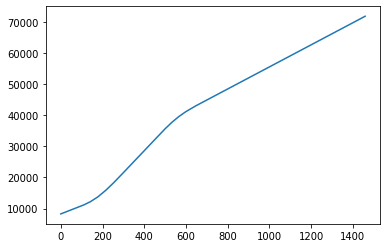

In [107]:
forecast['trend'].plot()

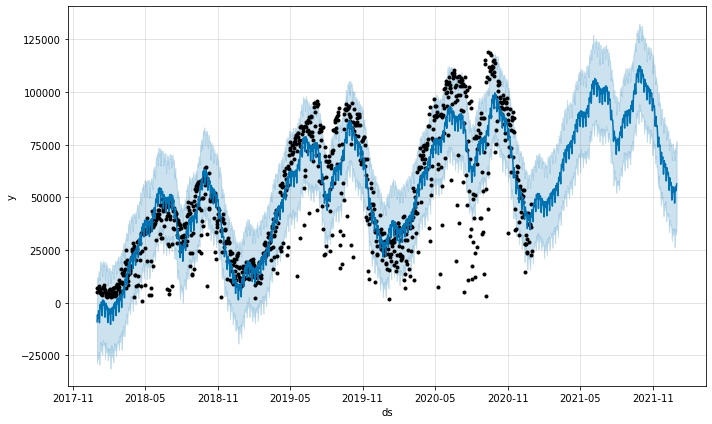

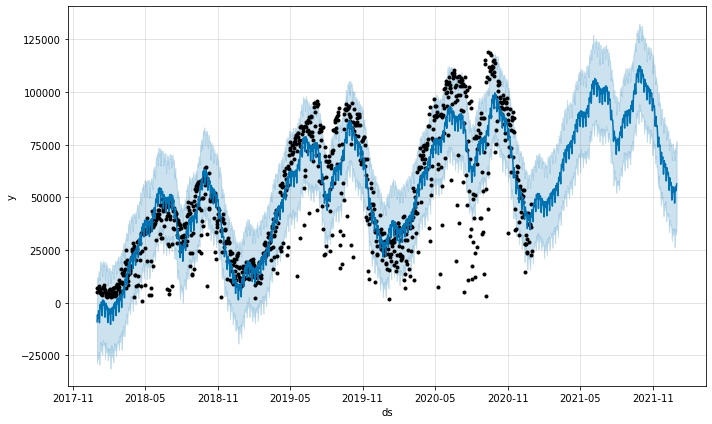

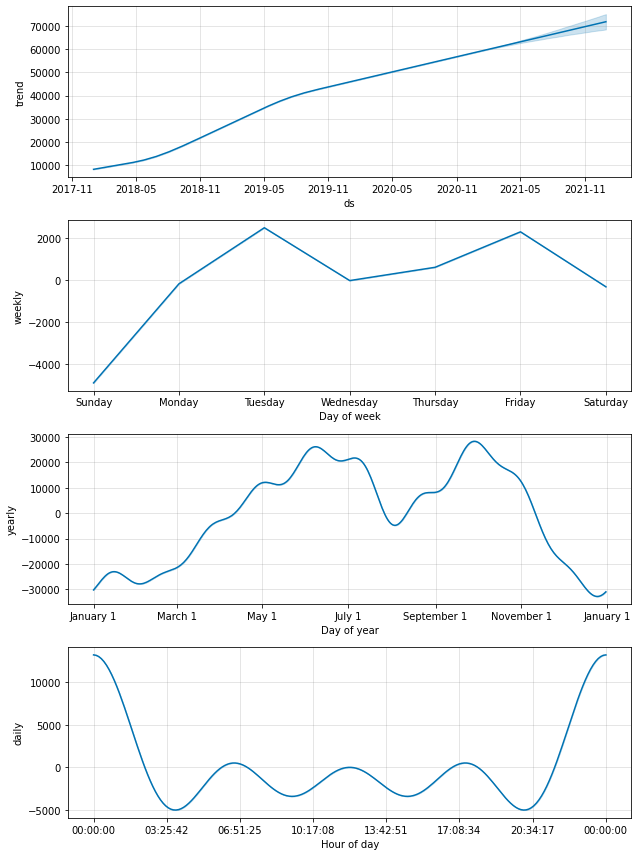

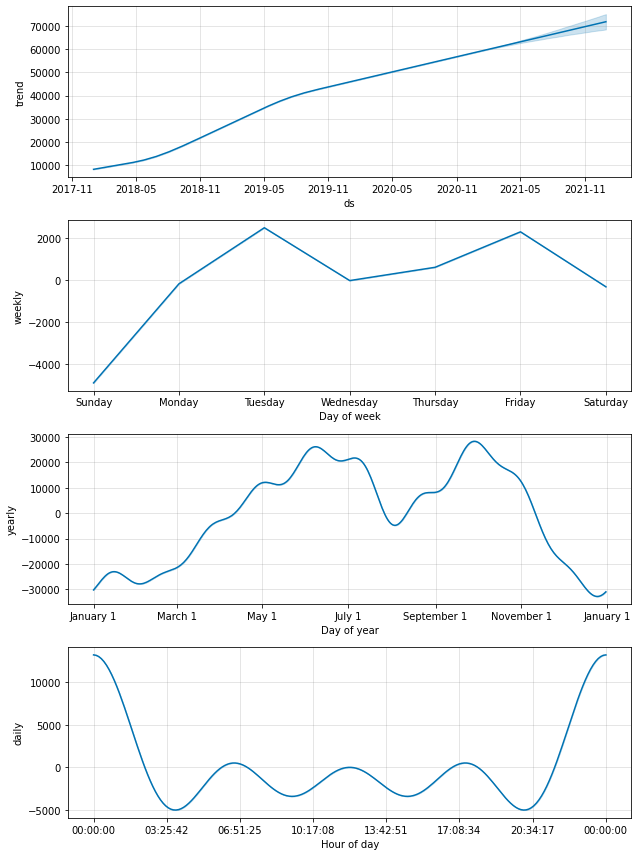

In [108]:
if not os.path.isdir('./img'):
    os.mkdir('./img')
m.plot(forecast)
m.plot(forecast).savefig('./img/rental_forecast.png')
m.plot_components(forecast)
m.plot_components(forecast).savefig('./img/rental_forecast_components.png')

## 2.2.4 prohet 트렌드 적용시 성능분석

In [109]:
random_state_list=[random.randint(0, 100) for _ in range(10)]
random_state_list

[5, 79, 21, 58, 45, 71, 89, 86, 88, 73]

In [110]:
train_df.fillna(0, inplace=True)
train_df2 = train_df.copy()
train_df2['rental']=train_df2['rental']/forecast[:-365]['trend']

In [111]:
X,y = train_df.iloc[:,1:-1].to_numpy(), train_df.iloc[:,-1].to_numpy()
X2,y2 = train_df2.iloc[:,1:-1].to_numpy(), train_df2.iloc[:,-1].to_numpy()

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.33, random_state=False)
for i, state in enumerate(random_state_list): 
    rf = RandomForestRegressor(oob_score=True, random_state=state)
    rf.fit(X_train, y_train)
    score=rf.score(X_test, y_test)
    print(f'{i+1}번째')
    print(f'Score : {score}')
    print(f'Oob_Score : {rf.oob_score_}')

1번째
Score : 0.7332025786179852
Oob_Score : 0.6765233617001644
2번째
Score : 0.7416800056524024
Oob_Score : 0.677809852921321
3번째
Score : 0.7382062861953995
Oob_Score : 0.6775148169478344
4번째
Score : 0.736415509959425
Oob_Score : 0.6827301880686864
5번째
Score : 0.7301197961498869
Oob_Score : 0.6760300137585054
6번째
Score : 0.7324184741213033
Oob_Score : 0.6769388140969772
7번째
Score : 0.7418076777746996
Oob_Score : 0.6774941017820123
8번째
Score : 0.7481538895514209
Oob_Score : 0.6763550967841904
9번째
Score : 0.7372729340796879
Oob_Score : 0.6742152613668508
10번째
Score : 0.7358440286017336
Oob_Score : 0.6723741158136123


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2 , test_size=0.33, random_state=False)
for i, state in enumerate(random_state_list): 
    rf = RandomForestRegressor(oob_score=True, random_state=state)
    rf.fit(X_train, y_train)
    score=rf.score(X_test, y_test)
    print(f'{i+1}번째')
    print(f'Score : {score}')
    print(f'Oob_Score : {rf.oob_score_}')

1번째
Score : 0.7979630217709429
Oob_Score : 0.8098499400037998
2번째
Score : 0.7998514320130283
Oob_Score : 0.8077665616662983
3번째
Score : 0.7964358578518814
Oob_Score : 0.8030343232619563
4번째
Score : 0.7952228049713295
Oob_Score : 0.8111256467514072
5번째
Score : 0.7939707137808643
Oob_Score : 0.8073463378247796
6번째
Score : 0.7964717821649052
Oob_Score : 0.805591692355901
7번째
Score : 0.7929519478297113
Oob_Score : 0.8034793258114975
8번째
Score : 0.7972520394681685
Oob_Score : 0.8092295701643386
9번째
Score : 0.7957010987044721
Oob_Score : 0.804164511121836
10번째
Score : 0.7968829681420223
Oob_Score : 0.8038057639748588


* 트렌드를 적용한 결과 성능이 개선됨

# Ⅲ 데이터 전처리 및 특징정보 추가

# 3.1 데이터 전처리

## 3.1.1 결측치 처리

### 결측치 행 제거 후 학습진행

In [8]:
train_df = deepcopy(train_df_backup)
train_df.dropna(axis=0, inplace=True)

In [9]:
X,y = train_df.iloc[:,1:-1].to_numpy(), train_df.iloc[:,-1].to_numpy()

In [10]:
X.shape, y.shape

((386, 11), (386,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=123456)

In [12]:
for i, state in enumerate(random_state_list): 
    rf = RandomForestRegressor(oob_score=True, random_state=state)
    rf.fit(X_train, y_train)
    score=rf.score(X_test, y_test)
    print(f'{i+1}번째')
    print(f'Score : {score}')
    print(f'Oob_Score : {rf.oob_score_}')

1번째
Score : 0.6367504903166681
Oob_Score : 0.6516788633015427
2번째
Score : 0.6336329576037865
Oob_Score : 0.6458057572676962
3번째
Score : 0.6430593432915341
Oob_Score : 0.6406486652269996
4번째
Score : 0.6413284724852445
Oob_Score : 0.6343480568232255
5번째
Score : 0.6344640091294422
Oob_Score : 0.64614137497163
6번째
Score : 0.6401442747948944
Oob_Score : 0.6457919952312761
7번째
Score : 0.6455456873657099
Oob_Score : 0.6370225781984254
8번째
Score : 0.6198409431896846
Oob_Score : 0.6419870590685898
9번째
Score : 0.6155096735203907
Oob_Score : 0.6464987334508933
10번째
Score : 0.6247154534044148
Oob_Score : 0.6540086571009925


In [13]:
print('\033[31m'+'Feature importance'+'\033[0m')
print(*sorted(zip(train_df.iloc[:,1:-1].columns ,rf.feature_importances_), key=lambda x : x[1], reverse=True), sep='\n')

Feature importance
('temp_highest', 0.32360768580116955)
('precipitation', 0.28586481432304534)
('humidity', 0.06782735191597596)
('temp_mean', 0.06589073464750762)
('wind_mean', 0.05389977750129226)
('sunshine_sum', 0.04746082164874536)
('temp_lowest', 0.04208108337927266)
('sunshine_rate', 0.03803043049372001)
('wind_max', 0.02729710645038015)
('PM10', 0.026389042358724465)
('PM2.5', 0.021651151480166723)


교차검증시 데이터부족으로 인한 학습부진 발생, 교차검증 점수는 oob score로 대체

### 결측치 열 제거후 학습진행

In [14]:
train_df = deepcopy(train_df_backup)
train_df.dropna(axis=1, inplace=True)
X,y = train_df.iloc[:,1:-1].to_numpy(), train_df.iloc[:,-1].to_numpy()
X.shape, y.shape

((1095, 7), (1095,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=123456)
for i, state in enumerate(random_state_list): 
    rf = RandomForestRegressor(oob_score=True, random_state=state)
    rf.fit(X_train, y_train)
    score=rf.score(X_test, y_test)
    print(f'{i+1}번째')
    print(f'Score : {score}')
    print(f'Oob_Score : {rf.oob_score_}')

1번째
Score : 0.5788748632898335
Oob_Score : 0.5889070633734034
2번째
Score : 0.5692414347708896
Oob_Score : 0.5899570726638563
3번째
Score : 0.5657883832797002
Oob_Score : 0.5919857114415834
4번째
Score : 0.5748188575601721
Oob_Score : 0.5905783596662164
5번째
Score : 0.5762625386139495
Oob_Score : 0.5936226794748685
6번째
Score : 0.5725428318438057
Oob_Score : 0.5882763793050098
7번째
Score : 0.5718618949505052
Oob_Score : 0.5986665904702615
8번째
Score : 0.5655754841406344
Oob_Score : 0.5847002792930165
9번째
Score : 0.5692939997224675
Oob_Score : 0.5879207760226488
10번째
Score : 0.5741195911694021
Oob_Score : 0.5900711981363265


열 제거시 특징정보 부족으로 인한 성능저하

In [16]:
print('\033[31m'+'Feature importance'+'\033[0m')
print(*sorted(zip(train_df.iloc[:,1:-1].columns ,rf.feature_importances_), key=lambda x : x[1], reverse=True), sep='\n')

Feature importance
('temp_highest', 0.35640691036787103)
('temp_mean', 0.167271463869861)
('humidity', 0.15512559255709749)
('sunshine_rate', 0.10145969715370509)
('wind_mean', 0.09650547565027802)
('temp_lowest', 0.07638779685776384)
('wind_max', 0.04684306354342366)


### Null 값 0으로 조정

In [17]:
train_df = deepcopy(train_df_backup)
train_df.fillna(0, inplace=True)

In [18]:
X,y = train_df.iloc[:,1:-1].to_numpy(), train_df.iloc[:,-1].to_numpy()
X.shape, y.shape

((1095, 11), (1095,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=123456)
for i, state in enumerate(random_state_list): 
    rf = RandomForestRegressor(oob_score=True, random_state=state)
    rf.fit(X_train, y_train)
    score=rf.score(X_test, y_test)
    print(f'{i+1}번째')
    print(f'Score : {score}')
    print(f'Oob_Score : {rf.oob_score_}')

1번째
Score : 0.7012665826413871
Oob_Score : 0.7257346536945285
2번째
Score : 0.7044820426987999
Oob_Score : 0.7170893690727659
3번째
Score : 0.710298096543602
Oob_Score : 0.7206832653786739
4번째
Score : 0.713289857423456
Oob_Score : 0.717905363256758
5번째
Score : 0.7120642075615111
Oob_Score : 0.7249620737302169
6번째
Score : 0.7141774268602189
Oob_Score : 0.7198691394070217
7번째
Score : 0.7105683473416868
Oob_Score : 0.7185902561016277
8번째
Score : 0.7043024834826039
Oob_Score : 0.7225667538865868
9번째
Score : 0.7077973707295924
Oob_Score : 0.7224219583863145
10번째
Score : 0.7069555690512074
Oob_Score : 0.7236276392709369


성능이 훨씬 개선됨

### Null 값 평균으로 조정

In [20]:
train_df = deepcopy(train_df_backup)
train_df.fillna(train_df.mean(), inplace=True)

/tmp/ipykernel_846/4105978821.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.fillna(train_df.mean(), inplace=True)


In [21]:
X,y = train_df.iloc[:,1:-1].to_numpy(), train_df.iloc[:,-1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=123456)
for i, state in enumerate(random_state_list): 
    rf = RandomForestRegressor(oob_score=True, random_state=state)
    rf.fit(X_train, y_train)
    score=rf.score(X_test, y_test)
    print(f'{i+1}번째')
    print(f'Score : {score}')
    print(f'Oob_Score : {rf.oob_score_}')

1번째
Score : 0.652592922072871
Oob_Score : 0.6769183265556656
2번째
Score : 0.6605055546733306
Oob_Score : 0.676590314872101
3번째
Score : 0.6549938468263123
Oob_Score : 0.6733812207991839
4번째
Score : 0.6544877914972129
Oob_Score : 0.6782058191848656
5번째
Score : 0.6558501515771942
Oob_Score : 0.681414873410253
6번째
Score : 0.6513389822513183
Oob_Score : 0.6781367927695982
7번째
Score : 0.6606089255109857
Oob_Score : 0.6789747414470613
8번째
Score : 0.6568190306994113
Oob_Score : 0.6856706685752083
9번째
Score : 0.6572245720752512
Oob_Score : 0.6768391127026268
10번째
Score : 0.658081012368641
Oob_Score : 0.6748594710646043


### Null 값 중간값으로 조정

In [22]:
train_df = deepcopy(train_df_backup)
train_df.fillna(train_df.median(), inplace=True)

/tmp/ipykernel_846/1783643082.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.fillna(train_df.median(), inplace=True)


In [23]:
X,y = train_df.iloc[:,1:-1].to_numpy(), train_df.iloc[:,-1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=123456)
for i, state in enumerate(random_state_list): 
    rf = RandomForestRegressor(oob_score=True, random_state=state)
    rf.fit(X_train, y_train)
    score=rf.score(X_test, y_test)
    print(f'{i+1}번째')
    print(f'Score : {score}')
    print(f'Oob_Score : {rf.oob_score_}')

1번째
Score : 0.6806910898003065
Oob_Score : 0.682289484592056
2번째
Score : 0.6804293019255908
Oob_Score : 0.6724480589537025
3번째
Score : 0.6862484208653927
Oob_Score : 0.6776414508300805
4번째
Score : 0.6814621219010213
Oob_Score : 0.6737230163361949
5번째
Score : 0.6779468031058178
Oob_Score : 0.6813946123095453
6번째
Score : 0.6792837444377166
Oob_Score : 0.6771931641545716
7번째
Score : 0.6897729197928637
Oob_Score : 0.6793574684815246
8번째
Score : 0.6731543568683227
Oob_Score : 0.6784961982127113
9번째
Score : 0.6830733178521298
Oob_Score : 0.6835965910831119
10번째
Score : 0.684809005476505
Oob_Score : 0.6807492853093607


* null 값을 제거할 때 column(세로)로 제거하면 중요도가 높은 강수량을 삭제하게 되어 성능이 떨어짐
* null 값을 제거할 때 row(가로)로 제거하면 데이터 수가 너무 줄어들음
* null 값을 조정한 결과, 제거했을 때에 비해 정확도가 향상되었으며 0으로 변경한 모델은 71% 정도로 성능이 가장 높았다.
|옵션|성능|
|---|---|
|null인 column 제거| 0.636750  |
|null인 row 제거| 0.57887  |
|null을 0으로 변경|  0.7012665 |
|null을 평균을 변경| 0.65259  |
|null을 중간값으로 변경| 0.680691  |

### 변수 별로 null값 조정하기

In [125]:
random_state_list=[random.randint(0, 100) for _ in range(5)]
random_state_list

[53, 14, 62, 11, 2]

In [126]:
train_df=pd.read_csv('./data/train.csv')
test_df=pd.read_csv('./data/test.csv')
train_df_backup = deepcopy(train_df)
test_df_backup = deepcopy(test_df)

In [127]:
train_df = deepcopy(train_df_backup)
train_df.fillna(0, inplace=True)
X,y = train_df.iloc[:,1:-1].to_numpy(), train_df.iloc[:,-1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.33, random_state=False)
for i, state in enumerate(random_state_list): 
    rf = RandomForestRegressor(oob_score=True, random_state=state)
    rf.fit(X_train, y_train)
    score=rf.score(X_test, y_test)
    print(f'{i+1}번째')
    print(f'Score : {score}')
    print(f'Oob_Score : {rf.oob_score_}')

1번째
Score : 0.738134893355588
Oob_Score : 0.6738366196228719
2번째
Score : 0.7371790128474209
Oob_Score : 0.676986679622722
3번째
Score : 0.7341429342832887
Oob_Score : 0.6778814043366412
4번째
Score : 0.74012102316934
Oob_Score : 0.6795495174668333
5번째
Score : 0.7379856519827159
Oob_Score : 0.6765265851879645


In [132]:
# 옵션에 따라, 선택한 데이터프레임의 컬럼의 결측값을 채워주는 함수
# option = 'zero', min, max, mean, median
def cal(my_df, column_name, option):
    df=my_df.copy()
    df['date']=pd.to_datetime(df['date'])
    df['month']=df['date'].dt.month
    nn_df = df.iloc[df[column_name].dropna().index]
    month_df_list=[nn_df[nn_df['month']==i] for i in range(1,13)]
    
    if option == 'zero':
        replace_list=[0 for month_df in month_df_list]
    elif option =='min':
        replace_list=[month_df[column_name].min() for month_df in month_df_list]
    elif option =='max':
        replace_list=[month_df[column_name].max() for month_df in month_df_list]
    elif option == 'mean':
        replace_list=[month_df[column_name].mean() for month_df in month_df_list]
    elif option == 'median':
        replace_list=[month_df[column_name].median() for month_df in month_df_list]
    
    replace_list = ['']+ replace_list
    
    result=[]
    for i in range(my_df.shape[0]):
        n=my_df.iloc[i][column_name]
        if math.isnan(n):
            result.append(replace_list[df.loc[i]['month']])
        else:
            result.append(n)
    my_df[column_name] = result

In [133]:
null_feature = ['precipitation','PM10','PM2.5','sunshine_sum']
options = ['zero', 'min', 'max', 'mean', 'median']

In [134]:
if not os.path.isdir('./model'):
    os.mkdir('./model')
model_list = []
score_list = []
my_option_groups = list(product(options, repeat=len(null_feature)))
for i, option_group in enumerate(my_option_groups):
    train_df = deepcopy(train_df_backup)
    for column_name, option in zip(null_feature, option_group):
        cal(train_df, column_name, option)
    X,y = train_df.iloc[:,1:-1].to_numpy(), train_df.iloc[:,-1].to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=False)
    rf = RandomForestRegressor(oob_score=True, random_state=state)
    model_name = '_'.join(option_group)
    joblib.dump(rf, f'./model/model_{model_name}.pkl')
    rf.fit(X_train, y_train)
    model_list.append(rf)
    score_list.append(rf.score(X_test, y_test))

In [139]:
my_option_groups = list(product(options, repeat=len(null_feature)))

In [141]:
my_option_groups = list(my_option_groups)
result_df=pd.DataFrame([[score, *my_option_groups[index]] for score, index in sorted(zip(score_list,range(625)), reverse=True)])
result_df.columns=['score', *null_feature]

In [142]:
result_df.head(10)

,score,precipitation,PM10,PM2.5,sunshine_sum
0,0.761349,median,median,zero,min
1,0.761349,median,median,zero,zero
2,0.759269,median,mean,zero,min
3,0.759269,median,mean,zero,zero
4,0.758286,median,median,zero,median
5,0.758281,median,median,zero,mean
6,0.758181,median,mean,zero,mean
7,0.758037,median,median,zero,max
8,0.757646,median,mean,zero,median
9,0.757419,median,max,zero,min


In [143]:
if not os.path.isdir('./csv'):
    os.mkdir('./csv')
result_df.to_csv('./csv/score_by_null_options.csv')

* precipitation, PM10,PM2.5,sunshine_sum 변수에서 결측값이 존재한다.
* 각각의 변수마다 0, min, max, mean, medain으로 조정하였을때, 모든 변수를 한가지 방법으로 조정한 것보다 좋은 성능을 낼 수 있었다.
* 현재 가장 좋은 조정방식은 아래와 같다
|precipitation|PM10|PM2.5|sunshine_sum|
|---|---|---|---|
|median|median|zero|min|
			

# 3.2 특징정보 추가
## 3.2.1시간변수 추가

In [114]:
train_df=pd.read_csv('./data/train.csv')
test_df=pd.read_csv('./data/test.csv')

In [115]:
forecast = pd.read_csv('./forecast/forecast_rental.csv', index_col=0)

In [116]:
train_df.fillna(0, inplace=True)
train_df['rental']=train_df['rental']/forecast[:-365]['trend']

In [117]:
train_df2 = train_df.copy()
train_df2['date']=pd.to_datetime(train_df2['date'])
train_df2['year']=train_df2['date'].dt.year
train_df2['month']=train_df2['date'].dt.month
train_df2['day']=train_df2['date'].dt.day
train_df2 = train_df2[[
        *train_df2.columns[train_df2.columns!='rental'], 
        *train_df2.columns[train_df2.columns=='rental']
    ]]

In [118]:
train_df.columns

Index(['date', 'precipitation', 'temp_mean', 'temp_highest', 'temp_lowest',
       'PM10', 'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate',
       'wind_mean', 'wind_max', 'rental'],
      dtype='object')

In [119]:
train_df2.columns

Index(['date', 'precipitation', 'temp_mean', 'temp_highest', 'temp_lowest',
       'PM10', 'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate',
       'wind_mean', 'wind_max', 'year', 'month', 'day', 'rental'],
      dtype='object')

In [120]:
X,y = train_df.iloc[:,1:-1].to_numpy(), train_df.iloc[:,-1].to_numpy()
X2,y2 = train_df2.iloc[:,1:-1].to_numpy(), train_df2.iloc[:,-1].to_numpy()

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.33, random_state=False)
for i, state in enumerate(random_state_list): 
    rf = RandomForestRegressor(oob_score=True, random_state=state)
    rf.fit(X_train, y_train)
    score=rf.score(X_test, y_test)
    print(f'{i+1}번째')
    print(f'Score : {score}')
    print(f'Oob_Score : {rf.oob_score_}')

1번째
Score : 0.7990283204833751
Oob_Score : 0.8099724587831736
2번째
Score : 0.7989544357854844
Oob_Score : 0.8090782556033669
3번째
Score : 0.7961694354204558
Oob_Score : 0.8033048898959889
4번째
Score : 0.7965719365246323
Oob_Score : 0.8122796913264385
5번째
Score : 0.7935308945107735
Oob_Score : 0.8068838192040384
6번째
Score : 0.7962381847700863
Oob_Score : 0.8044019828098884
7번째
Score : 0.7949772899019651
Oob_Score : 0.8038787875773402
8번째
Score : 0.7981774423448263
Oob_Score : 0.8118795371584742
9번째
Score : 0.7942285022375327
Oob_Score : 0.8040363582729506
10번째
Score : 0.7967790279307323
Oob_Score : 0.8045772998307466


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2 , test_size=0.33, random_state=False)
for i, state in enumerate(random_state_list): 
    rf2 = RandomForestRegressor(oob_score=True, random_state=state)
    rf2.fit(X_train, y_train)
    score=rf2.score(X_test, y_test)
    print(f'{i+1}번째')
    print(f'Score : {score}')
    print(f'Oob_Score : {rf2.oob_score_}')

1번째
Score : 0.9029960729779669
Oob_Score : 0.9050079841960179
2번째
Score : 0.9031744603218401
Oob_Score : 0.9075325716245601
3번째
Score : 0.9018137130489686
Oob_Score : 0.9044534290417428
4번째
Score : 0.9034211760832654
Oob_Score : 0.9047820666460791
5번째
Score : 0.9004359983701845
Oob_Score : 0.9044838940041758
6번째
Score : 0.9018309131040209
Oob_Score : 0.9085082164748377
7번째
Score : 0.903429208871111
Oob_Score : 0.9085406698056059
8번째
Score : 0.9011026627852399
Oob_Score : 0.9047995462003667
9번째
Score : 0.8971708528242096
Oob_Score : 0.9084777756644563
10번째
Score : 0.9043493268922145
Oob_Score : 0.9065305335955561


* 시간변수를 추가하여 성능이 더 개선되는 것을 알 수 있다.

In [123]:
print(*sorted(zip(train_df.iloc[:,1:-1].columns ,rf.feature_importances_), key=lambda x : x[1], reverse=True), sep='\n')

('temp_highest', 0.5665670615252583)
('humidity', 0.10344438864426361)
('precipitation', 0.09265170055754463)
('sunshine_sum', 0.04480744071242498)
('sunshine_rate', 0.04143866049120795)
('PM2.5', 0.036567564693729064)
('PM10', 0.03323924315716448)
('temp_mean', 0.022933479771399336)
('wind_mean', 0.02143027596254096)
('temp_lowest', 0.020093589654973824)
('wind_max', 0.016826594829492877)


In [124]:
print(*sorted(zip(train_df2.iloc[:,1:-1].columns ,rf2.feature_importances_), key=lambda x : x[1], reverse=True), sep='\n')

('temp_highest', 0.5509200264415486)
('year', 0.11938483218888284)
('precipitation', 0.08827644476159273)
('humidity', 0.08127689608715176)
('sunshine_sum', 0.032879205561391574)
('sunshine_rate', 0.028596671020856536)
('temp_mean', 0.025107878323935046)
('temp_lowest', 0.023439341790760928)
('month', 0.01600179575221522)
('PM2.5', 0.008410541841199808)
('PM10', 0.007367867172996071)
('day', 0.0070641840759857605)
('wind_max', 0.006505383167863644)
('wind_mean', 0.004768931813619521)


* 또한 year와 month가 높은 중요도를 가지는 것도 확인할 수 있었다

# Ⅳ 알고리즘선택

앞서 모두 RandomForest를 사용했지만, 분석 성능이 더 뛰어난 알고리즘을 탐색했다.

이때, 분석에 뛰어난 알고리즘을 탐색하는 데 최적화된 auto ml을 사용하였다.

# 4.1 auto ml

In [ ]:
from supervised.automl import BaseAutoML, AutoML

from prophet import Prophet

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import joblib

import pandas as pd
import numpy as np

import random
from copy import deepcopy
import math
from itertools import product
import os

In [19]:
train_df=pd.read_csv('./data/train.csv')
test_df=pd.read_csv('./data/test.csv')

In [20]:
df=train_df[['date','rental']].copy()
df.columns=['ds','y']
m = Prophet()
m.daily_seasonality=True
m.weekly_seasonality=True
m.yearly_seasonality=True
m.fit(df)
future=m.make_future_dataframe(365)
forecast = m.predict(future)

Initial log joint probability = -73.9282
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1699.14   5.17586e-06       69.4858      0.7698      0.7698      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       1699.17   0.000410967       93.1272   3.446e-06       0.001      181  LS failed, Hessian reset 
     150       1699.19   3.83621e-05       77.7678   4.552e-07       0.001      266  LS failed, Hessian reset 
     177       1699.19    1.5188e-07       69.0376      0.2292           1      304   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [21]:
train_df['rental']=train_df['rental']/forecast[:-365]['trend']

In [22]:
train_df['date']=pd.to_datetime(train_df['date'])
train_df['year']=train_df['date'].dt.year
train_df['month']=train_df['date'].dt.month
train_df['day']=train_df['date'].dt.day
train_df['weekday'] = train_df['date'].dt.dayofweek
train_df = pd.get_dummies(data = train_df, prefix=['year'], columns=['year'])
train_df['year']=train_df['date'].dt.year

In [23]:
train_df.columns

Index(['date', 'precipitation', 'temp_mean', 'temp_highest', 'temp_lowest',
       'PM10', 'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate',
       'wind_mean', 'wind_max', 'rental', 'month', 'day', 'weekday',
       'year_2018', 'year_2019', 'year_2020', 'year'],
      dtype='object')

In [24]:

train_df = train_df[['date', 'precipitation', 'temp_mean', 'temp_highest', 'temp_lowest',
       'PM10', 'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate',
       'wind_mean', 'wind_max', 'month', 'day', 'weekday',
       'year_2018', 'year_2019', 'year_2020', 'year', 'rental']]

In [25]:
# 옵션에 따라, 선택한 데이터프레임의 컬럼의 결측값을 채워주는 함수
# option = 0, min, max, mean, median
def cal(my_df, column_name, option):
    df=my_df.copy()
    df['date']=pd.to_datetime(df['date'])
    df['month']=df['date'].dt.month
    nn_df = df.iloc[df[column_name].dropna().index]
    month_df_list=[nn_df[nn_df['month']==i] for i in range(1,13)]
    
    if option == 0:
        replace_list=[0 for month_df in month_df_list]
    elif option =='min':
        replace_list=[month_df[column_name].min() for month_df in month_df_list]
    elif option =='max':
        replace_list=[month_df[column_name].max() for month_df in month_df_list]
    elif option == 'mean':
        replace_list=[month_df[column_name].mean() for month_df in month_df_list]
    elif option == 'median':
        replace_list=[month_df[column_name].median() for month_df in month_df_list]
    
    replace_list = ['']+ replace_list
    
    result=[]
    for i in range(my_df.shape[0]):
        n=my_df.iloc[i][column_name]
        if math.isnan(n):
            result.append(replace_list[df.loc[i]['month']])
        else:
            result.append(n)
    my_df[column_name] = result

In [26]:
null_feature = ['precipitation','PM10','PM2.5','sunshine_sum']
best_option_group = ['min' , 'max' , 'median' , 'min']
for column_name, option in zip(null_feature, best_option_group):
    cal(train_df, column_name, option)

In [27]:
random_state_list=[random.randint(0, 100) for _ in range(10)]
random_state_list

[38, 72, 71, 2, 42, 73, 81, 66, 100, 36]

In [28]:
train_df.to_csv('./sss.csv')

In [29]:
X,y = train_df.iloc[:,1:-1].to_numpy(), train_df.iloc[:,-1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.33, random_state=False)

In [30]:
automl = AutoML(mode="Explain", n_jobs=-1, results_path='./hojun7_explain')
automl.fit(X_train, y_train)

AutoML directory: ./hojun7_explain
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline rmse 0.775359 trained in 0.21 seconds
Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
2_DecisionTree rmse 0.435331 trained in 1.75 seconds
Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
3_Linear rmse 0.422092 trained in 0.75 seconds
* Step default_algorithms will try to check up to 3 models
Exception while producing SHAP explanation

AutoML(results_path='./hojun7_explain')

In [31]:
model=AutoML(results_path='./hojun7_explain')

In [32]:
r2_score(y_test, model.predict(X_test))

X has feature names, but StandardScaler was fitted without feature names


0.9186419971187139

In [11]:
automl = AutoML(mode="Compete", n_jobs=-1, results_path='./hojun8_compete')
automl.fit(X_train, y_train)

AutoML directory: ./hojun8_compete
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree rmse 0.457712 trained in 0.2 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 10-fold CV Shuffle
* Step simple_algorithms will try to check up to 4 models
1_DecisionTree rmse 0.405359 trained in 1.0 seconds
2_DecisionTree rmse 0.369951 trained in 0.89 seconds
3_DecisionTree rmse 0.369951 trained in 0.94 seconds
4_L

KeyboardInterrupt: 

In [ ]:
model=AutoML(results_path="./hojun8_compete")

In [ ]:
r2_score(y_test, model.predict(X_test))

* explain과 compete모드를 사용한 결과 compete가 더 성능이 높게 나왔으나, 따릉이의 경우 explain의 리더보드 점수가 더 높았다.

# V 결론

* reantal data는 시간에 따른 트렌드를 가지고 있었으며, 트렌드를 고려한 데이터 전처리 작업을 진행하였다.
* 각 변수의 결측치는 0, min, max, mean, median중 가장 적절한 방식을 각 변수에 맞게 선택하였다.
* 알고리즘은 automl을 통해 최적화하였다

# VI 제출 파일 생성 코드

In [1]:
from supervised.automl import BaseAutoML, AutoML

from prophet import Prophet

import pandas as pd

import math

In [2]:
train_df=pd.read_csv('./data/train.csv')
test_df=pd.read_csv('./data/test.csv')

In [3]:
df=train_df[['date','rental']].copy()
df.columns=['ds','y']
m = Prophet()
m.daily_seasonality=True
m.weekly_seasonality=True
m.yearly_seasonality=True
m.fit(df)
future=m.make_future_dataframe(365)
forecast = m.predict(future)

Initial log joint probability = -73.9282
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1699.14   5.17586e-06       69.4858      0.7698      0.7698      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       1699.17   0.000410967       93.1272   3.446e-06       0.001      181  LS failed, Hessian reset 
     150       1699.19   3.83621e-05       77.7678   4.552e-07       0.001      266  LS failed, Hessian reset 
     177       1699.19    1.5188e-07       69.0376      0.2292           1      304   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [4]:
train_df['rental']=train_df['rental']/forecast[:-365]['trend']

In [5]:
train_df['date']=pd.to_datetime(train_df['date'])
train_df['year']=train_df['date'].dt.year
train_df['month']=train_df['date'].dt.month
train_df['day']=train_df['date'].dt.day
train_df['weekday'] = train_df['date'].dt.dayofweek
# train_df = pd.get_dummies(data = train_df, prefix=['year'], columns=['year'])
# train_df['year']=train_df['date'].dt.year

In [6]:
train_df.columns

Index(['date', 'precipitation', 'temp_mean', 'temp_highest', 'temp_lowest',
       'PM10', 'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate',
       'wind_mean', 'wind_max', 'rental', 'year', 'month', 'day', 'weekday'],
      dtype='object')

In [21]:
train_df = train_df[['date', 'precipitation', 'temp_mean', 'temp_highest', 'temp_lowest',
       'PM10', 'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate',
       'wind_mean', 'wind_max', 'year','month', 'day', 'weekday',
        'rental']]

In [22]:
test_df['date']=pd.to_datetime(test_df['date'])
test_df['year']=test_df['date'].dt.year
test_df['month']=test_df['date'].dt.month
test_df['day']=test_df['date'].dt.day
test_df['weekday'] = test_df['date'].dt.dayofweek

In [23]:
# 옵션에 따라, 선택한 데이터프레임의 컬럼의 결측값을 채워주는 함수
# option = 0, min, max, mean, median
def cal(my_df, column_name, option):
    df=my_df.copy()
    df['date']=pd.to_datetime(df['date'])
    df['month']=df['date'].dt.month
    nn_df = df.iloc[df[column_name].dropna().index]
    month_df_list=[nn_df[nn_df['month']==i] for i in range(1,13)]
    
    if option == 0:
        replace_list=[0 for month_df in month_df_list]
    elif option =='min':
        replace_list=[month_df[column_name].min() for month_df in month_df_list]
    elif option =='max':
        replace_list=[month_df[column_name].max() for month_df in month_df_list]
    elif option == 'mean':
        replace_list=[month_df[column_name].mean() for month_df in month_df_list]
    elif option == 'median':
        replace_list=[month_df[column_name].median() for month_df in month_df_list]
    
    replace_list = ['']+ replace_list
    
    result=[]
    for i in range(my_df.shape[0]):
        n=my_df.iloc[i][column_name]
        if math.isnan(n):
            result.append(replace_list[df.loc[i]['month']])
        else:
            result.append(n)
    my_df[column_name] = result

In [24]:
null_feature = ['precipitation','PM10','PM2.5','sunshine_sum']
best_option_group = ['min' , 'max' , 'median' , 'min']
for column_name, option in zip(null_feature, best_option_group):
    cal(train_df, column_name, option)
for column_name, option in zip(null_feature, best_option_group):
    cal(test_df, column_name, option)

In [25]:
train_df.to_csv('./sss.csv')

In [26]:
X_train, y_train = train_df.iloc[:,1:-1].to_numpy(), train_df.iloc[:,-1].to_numpy()
X_test = test_df.iloc[:,1:].to_numpy()

In [27]:
train_df.iloc[:,1:-1]

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,year,month,day,weekday
0,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,2018,1,1,0
1,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,2018,1,2,1
2,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,2018,1,3,2
3,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,2018,1,4,3
4,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,2018,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,2020,12,27,6
1091,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,2020,12,28,0
1092,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,2020,12,29,1
1093,0.0,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,2020,12,30,2


In [28]:
test_df.iloc[:,1:]

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,year,month,day,weekday
0,0.0,-4.2,1.6,-9.8,30.0,17.0,64.0,6.5,67.7,2.0,4.1,2021,1,1,4
1,0.0,-5.0,-1.4,-8.4,34.0,12.0,38.5,9.0,93.8,2.6,5.4,2021,1,2,5
2,0.0,-5.6,-2.0,-9.1,39.0,14.0,45.0,5.5,56.7,2.0,4.5,2021,1,3,6
3,0.0,-3.5,0.3,-8.4,40.0,23.0,51.4,4.6,47.4,1.7,3.2,2021,1,4,0
4,0.0,-5.5,-2.1,-9.9,30.0,17.0,52.8,8.6,88.7,2.9,5.7,2021,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,-7.6,-3.9,-12.9,33.0,20.0,60.9,3.8,39.6,1.7,3.1,2021,12,27,0
361,0.0,-4.1,-0.9,-8.5,51.0,38.0,73.8,1.7,17.7,2.2,3.1,2021,12,28,1
362,0.2,0.4,5.9,-3.8,66.0,49.0,72.9,1.8,18.8,2.6,5.9,2021,12,29,2
363,0.0,-3.9,0.2,-6.8,30.0,17.0,48.5,7.3,76.0,3.3,6.6,2021,12,30,3


In [35]:
automl = AutoML(mode="Explain", n_jobs=-1, results_path='./결과내기_explain2')
automl.fit(X_train, y_train)

AutoML directory: ./결과내기_explain2
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline rmse 0.795498 trained in 0.19 seconds
Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
2_DecisionTree rmse 0.418362 trained in 7.09 seconds
3_Linear rmse 0.416528 trained in 1.61 seconds
* Step default_algorithms will try to check up to 3 models
Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
4_Default_Xgboost rmse 0.248067 trained in 

AutoML(results_path='./결과내기_explain2')

In [36]:
model=AutoML(results_path='./결과내기_explain2')

In [37]:
my_result_df = pd.DataFrame()

In [38]:
my_result_df['date'] = test_df['date']

In [39]:
my_result_df['rental']=list( forecast[-365:]['trend'] * model.predict(X_test))

X has feature names, but StandardScaler was fitted without feature names


In [40]:
my_result_df.set_index('date', inplace=True)

In [41]:
my_result_df

,rental
date,
2021-01-01,27006.035017
2021-01-02,23358.848979
2021-01-03,20263.502042
2021-01-04,30143.865679
2021-01-05,23845.278262
...,...
2021-12-27,31393.953494
2021-12-28,36673.731701
2021-12-29,48101.616642


In [42]:
my_result_df.to_csv('./final_explain.csv')

<AxesSubplot:xlabel='date'>

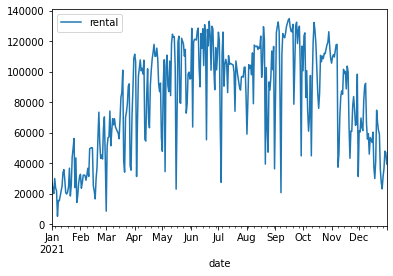

In [43]:
my_result_df.plot()